In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from fastai.vision import *

foldermercedes = 'mercedes'
filemercedes = 'urls_mercedes.csv'

folderaudi = 'audi'
fileaudi = 'urls_audi.csv'

foldervolkswagen = 'volkswagen'
filevolkswagen = 'urls_volkswagen.csv'
folderbmw = 'bmw'
filebmw = 'urls_bmw.csv'

path = Path('drive/My Drive/BioInf')

destmercedes = path/foldermercedes
destmercedes.mkdir(parents=True, exist_ok=True)

destaudi = path/folderaudi
destaudi.mkdir(parents=True, exist_ok=True)

destvolkswagen = path/foldervolkswagen
destvolkswagen.mkdir(parents=True, exist_ok=True)

destbmw = path/folderbmw
destbmw.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['mercedes','audi','volkswagen','bmw']

In [0]:
#download_images(path/filemercedes, destmercedes, max_pics=200, max_workers=0)
#download_images(path/fileaudi, destaudi, max_pics=200, max_workers=0)
#download_images(path/filevolkswagen, destvolkswagen, max_pics=200, max_workers=0)
#download_images(path/filebmw, destbmw, max_pics=200, max_workers=0)

In [22]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)


mercedes


audi


volkswagen


bmw


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=448, num_workers=4).normalize(imagenet_stats)

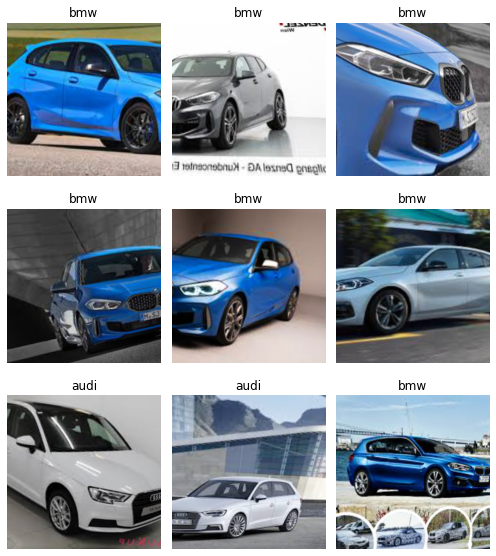

In [24]:
data.show_batch(rows=3, figsize=(7,8))

In [25]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['audi', 'bmw', 'mercedes', 'volkswagen'], 4, 247, 61)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [27]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.335174,1.500433,0.622951,00:06
1,1.973802,1.149220,0.344262,00:06
2,1.580335,1.090446,0.295082,00:05
3,1.353800,1.009434,0.311475,00:06


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


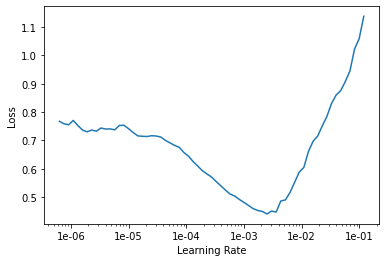

In [28]:
learn.save('stage-1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()


In [31]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))
learn.save('stage-2')
learn.load('stage-2')

epoch,train_loss,valid_loss,error_rate,time
0,0.082507,0.575357,0.131148,00:06
1,0.085002,0.564756,0.114754,00:06


Learner(data=ImageDataBunch;

Train: LabelList (247 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
mercedes,mercedes,mercedes,mercedes,mercedes
Path: drive/My Drive/BioInf;

Valid: LabelList (61 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
bmw,mercedes,mercedes,mercedes,mercedes
Path: drive/My Drive/BioInf;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=

In [32]:
interp = ClassificationInterpretation.from_learner(learn)

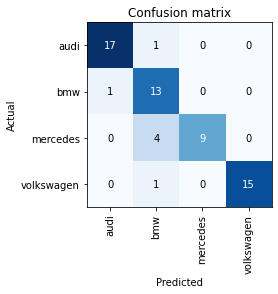

In [33]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
defaults.device=torch.device('cpu')

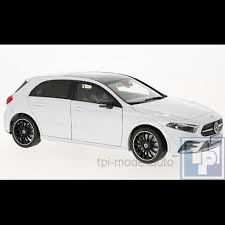

In [36]:
img=open_image(path/'mercedes'/'00000111.jpg')
img

In [37]:
learn=load_learner(path)
pred_class,pred_idx,outputs=learn.predict(img)
pred_class

Category mercedes

In [0]:
!rm -rf carData/volkswagen
!rm -rf carData/bmw
!rm -rf carData/audi
!rm -rf carData/mercedes